In [35]:
import sys
sys.path.append("/Users/anuram/Documents/hydrogenase-ftir/src")
sys.path.append("/Users/anuram/Documents/hydrogenase-ftir/notebooks/anu_winter_2024")
#sys.path.append("/Users/anuram/Documents/Documents/hydrogenase-ftir/src/hydrogenase_processing")

In [58]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pathlib

#Local Functions
from hydrogenase_processing.cut_range import cut_range_subtract_prospecpy_objects
from hydrogenase_processing.second_deriv import  second_deriv_prospecpy_objects
from hydrogenase_processing.baseline import baseline_correction_prospecpy_objects
from hydrogenase_processing.peak_fit import gaussian_fit_prospecpy_objects, lorentzian_fit_prospecpy_objects
from hydrogenase_processing.io import import_run_data
from hydrogenase_processing.interact import interact


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing spectra data and water vapor data

In [37]:
#Paths to Local Data
path_to_water_vapor_data = pathlib.Path("../../data/opus_files/water_vapor")
path_to_output_plots_= pathlib.Path("../../data/output_plots/")
path_to_pD6_data = pathlib.Path("../../data/opus_files/pD6")

In [40]:
pD6_raw_data = import_run_data(path_to_pD6_data, input_type="raw spectra", output_folder = '/Users/anuram/Documents/240808_test3')
wv_data = import_run_data(path_to_water_vapor_data)

# Subtracting water vapor from raw spectra

In [41]:
#Initializing dict of post water vapor subtraction spectra
cut_range_subtract_prospecpy_objects(pD6_raw_data, wv_data, range_start = 2150, range_end = 1850, showplots=False, verbose= True)
#pD6_raw_data[].cut_subtracted_data

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/cut_range_subtracted_spectra
Atmospheric fit parameters saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/cut_atmfitparameters.csv
Cut subtracted data saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/cut_subtracted_data.csv
Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/cut_range_subtracted_spectra
Atmospheric fit parameters saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/cut_atmfitparameters.csv
Cut subtracted data saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/cut_subtracted_data.csv
Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/cut_range_subtracted_spectra
Atmospheric fit parameters saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/cut_atmfitparameters.csv
Cut subtracted data saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/cut_subtracted_data.cs

## Get the second derivatives

In [42]:
second_deriv_prospecpy_objects(pD6_raw_data, show_plots=False, verbose = True)

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/subtracted_spectra
Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/second_derivative_data.csv
Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/subtracted_spectra
Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Docume

## Using a user interface please select the appropriate number of peaks using the threshold variable and number of anchor points using adjustment factor variable

In [43]:
interact(pD6_raw_data,0.4,1.8)

ToggleButtons(description='Step 1. File selection:', options=('Hyd1 pD6 ACT.0000', 'Hyd1 pD6 ACT.0001', 'Hyd1 …

Output()

BoundedFloatText(value=0.4, description='Threshold for peak selection(0 to 1 in 0.01 steps):', layout=Layout(w…

BoundedFloatText(value=1.8, description='adj for anchor point selection(0 to 5 in 0.01 steps):', layout=Layout…

Button(description='Save', style=ButtonStyle())

In [ ]:
pD6_raw_data[0].output_folder

# Baseline correction and cruve fit for an example spectra workflow:

## Fit baseline spline through these anchor points to be used for baseline correction of raw spectra

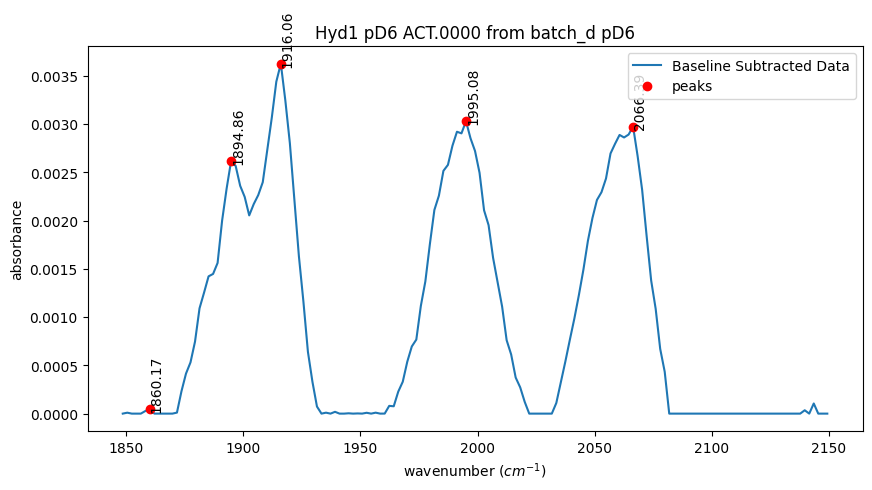

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/baseline_subtracted_spectra
Baseline subtracted_spectra plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/baseline_subtracted_spectra
Baseline corrected csv data saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/baseline_corrected_data.csv
Baseline corrected peak info saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/baseline_corrected_peak_info.csv


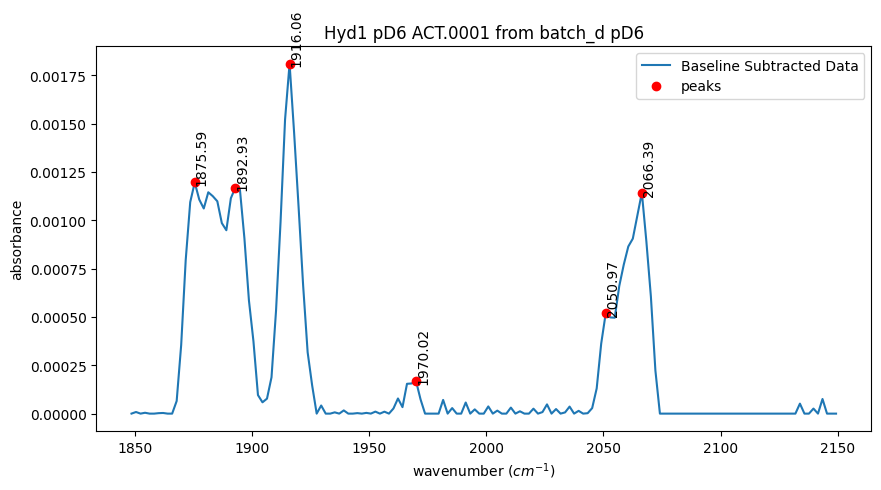

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/baseline_subtracted_spectra
Baseline subtracted_spectra plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/baseline_subtracted_spectra
Baseline corrected csv data saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/baseline_corrected_data.csv
Baseline corrected peak info saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/baseline_corrected_peak_info.csv


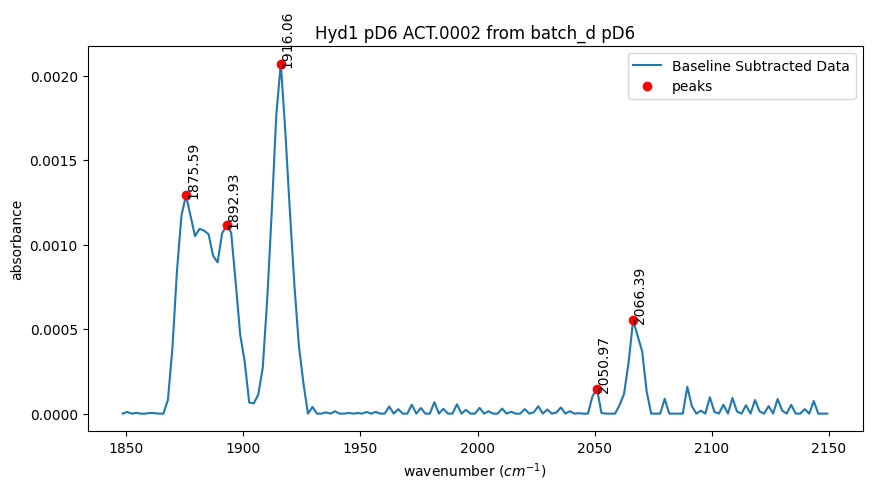

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/baseline_subtracted_spectra
Baseline subtracted_spectra plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/baseline_subtracted_spectra
Baseline corrected csv data saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/baseline_corrected_data.csv
Baseline corrected peak info saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/baseline_corrected_peak_info.csv


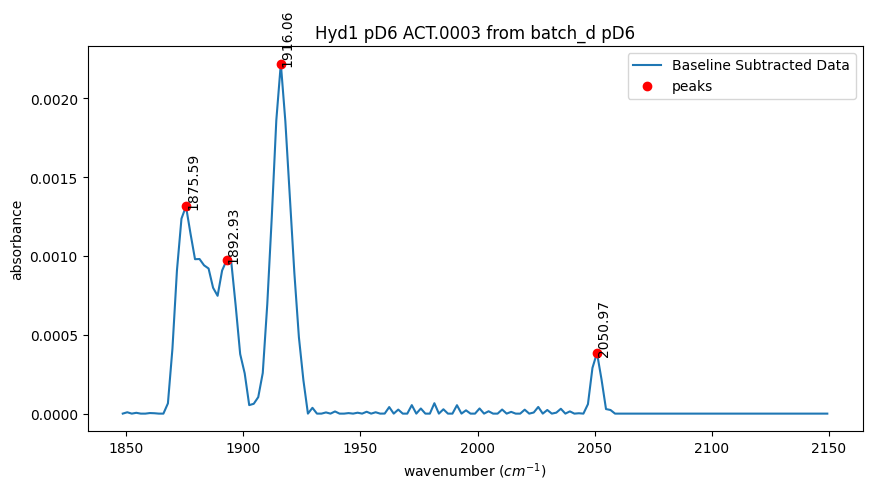

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0003/baseline_subtracted_spectra
Baseline subtracted_spectra plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0003/baseline_subtracted_spectra
Baseline corrected csv data saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0003/baseline_corrected_data.csv
Baseline corrected peak info saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0003/baseline_corrected_peak_info.csv
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustment factor for baseline spline!
Please set and save the thresholds and adjustmen

In [44]:
baseline_correction_prospecpy_objects(pD6_raw_data, showplot = True, save = True, verbose = True)

# Fitting gaussian and lorentizian curves on the baseline corrected data

In [64]:
pD6_raw_data[0].gaussian_peak_fit_parameters

array([ 8.64871962e-02,  2.05992580e+03,  1.14086059e+01,  9.08598753e-02,
        1.99290929e+03,  1.20076450e+01,  4.58881640e-02,  1.91672608e+03,
        5.94271040e+00,  6.38969887e-02,  1.89639871e+03,  1.06524569e+01,
       -3.09811910e-04,  1.85927555e+03, -4.68301088e-01])

[0.0029723450589838746, 2066.3872206499536, 26.0, 0.0030280876001303886, 1995.077760984728, 33.0, 0.003624718517062496, 1916.0591705448833, 33.0, 0.002618837347733896, 1894.8590609146809, 5.838793709040573, 5.033982679292226e-05, 1860.1679724288952, 3.0]
[ 8.64871962e-02  2.05992580e+03  1.14086059e+01  9.08598753e-02
  1.99290929e+03  1.20076450e+01  4.58881640e-02  1.91672608e+03
  5.94271040e+00  6.38969887e-02  1.89639871e+03  1.06524569e+01
 -3.09811910e-04  1.85927555e+03 -4.68301088e-01]


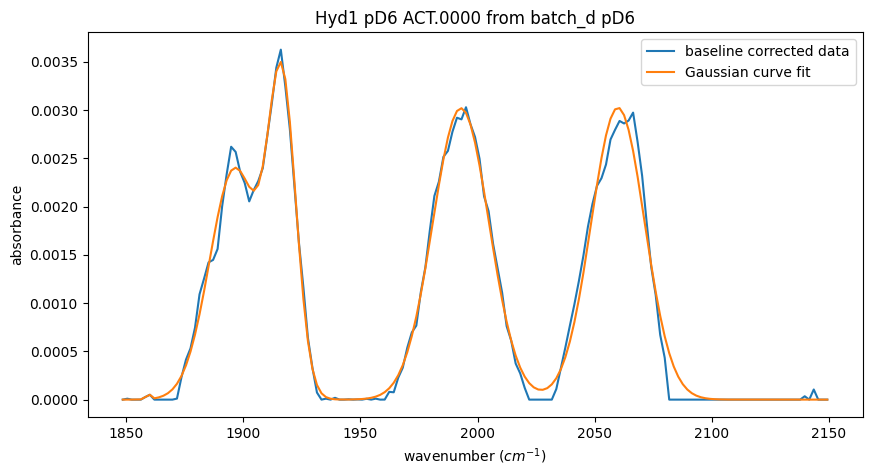

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/gaussian_fit_plot
[0.0011430607950641703, 2066.3872206499536, 17.0, 0.0005186204337119557, 2050.968959100716, 2.1439123293050812, 0.00016821582650548145, 1970.0230859672163, 8.0, 0.0018104484679779473, 1916.0591705448833, 32.0, 0.0011693104353059786, 1892.931778221026, 3.8354839548973985, 0.0011955955224273243, 1875.5862339781334, 19.103168657695335]
[6.96195265e-03 2.06657096e+03 3.31350442e+00 1.10137163e-02
 2.05772733e+03 6.37449917e+00 1.29560478e-03 1.96815462e+03
 2.96020673e+00 1.77723536e-02 1.87815977e+03 5.74765573e+00
 1.46707454e-02 1.89288759e+03 5.15023182e+00 1.68206434e-02
 1.91623214e+03 3.88371495e+00]


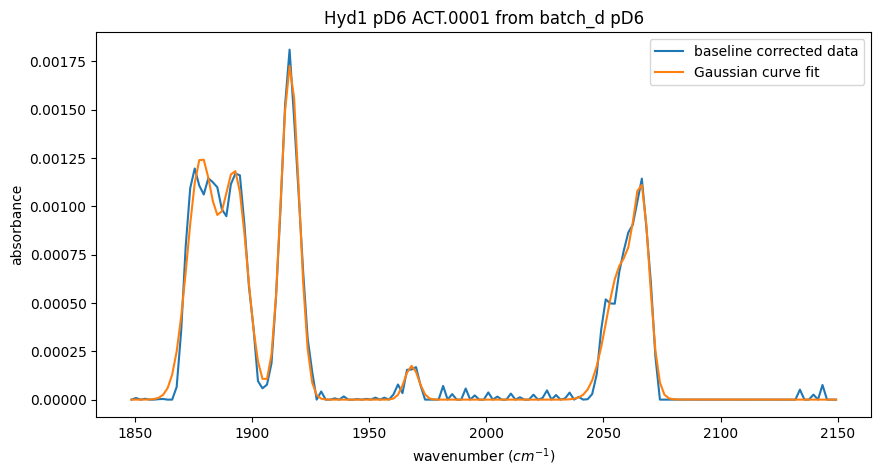

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/gaussian_fit_plot
[0.0005527037665524958, 2066.3872206499536, 8.0, 0.00014631668566553353, 2050.968959100716, 4.0, 0.002070882551086402, 1916.0591705448833, 32.0, 0.0011135209586031238, 1892.931778221026, 3.6019288040605204, 0.0012917076785274838, 1875.5862339781334, 19.258602427031576]
[ 2.23272503e-02  1.03702969e+03 -6.25412106e+01  2.08124954e-03
  1.90417883e+03 -3.13123050e+00  3.87302716e-03  2.06739002e+03
  2.84636606e+00 -3.43716976e-02  1.88469626e+03 -1.12164655e+01
 -1.94677169e-02  1.91617512e+03 -4.00363322e+00]


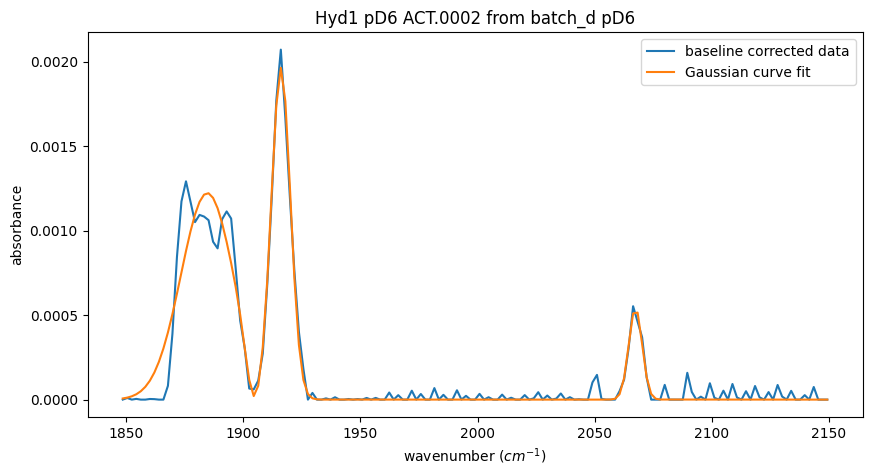

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/gaussian_fit_plot
[0.00038507137176584105, 2050.968959100716, 7.0, 0.002221330375266891, 1916.0591705448833, 32.0, 0.0009732030696066284, 1892.931778221026, 3.783977183277017, 0.0013155926921767525, 1875.5862339781334, 18.172036360141846]
An error occurred: Optimal parameters not found: Number of calls to function has reached maxfev = 2600.


In [68]:
gaussian_fit_prospecpy_objects(pD6_raw_data, show_plots = True, save = True, verbose = True)

processing plots for Hyd1 pD6 ACT.0000


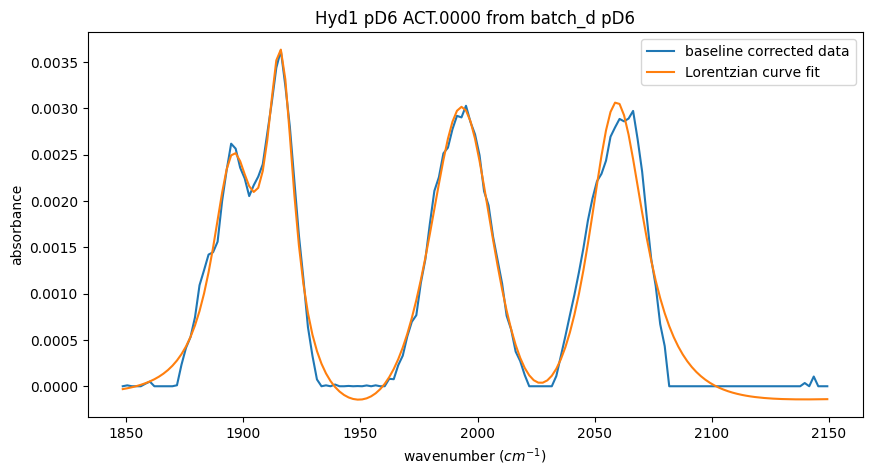

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/lorentzian_fit_plot
Lorentzian fit plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0000/lorentzian_fit_plot
processing plots for Hyd1 pD6 ACT.0001


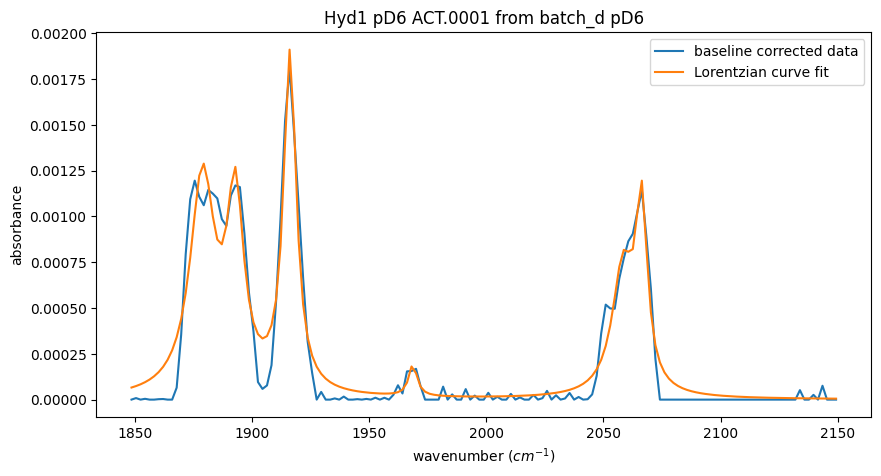

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/lorentzian_fit_plot
Lorentzian fit plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0001/lorentzian_fit_plot
processing plots for Hyd1 pD6 ACT.0002


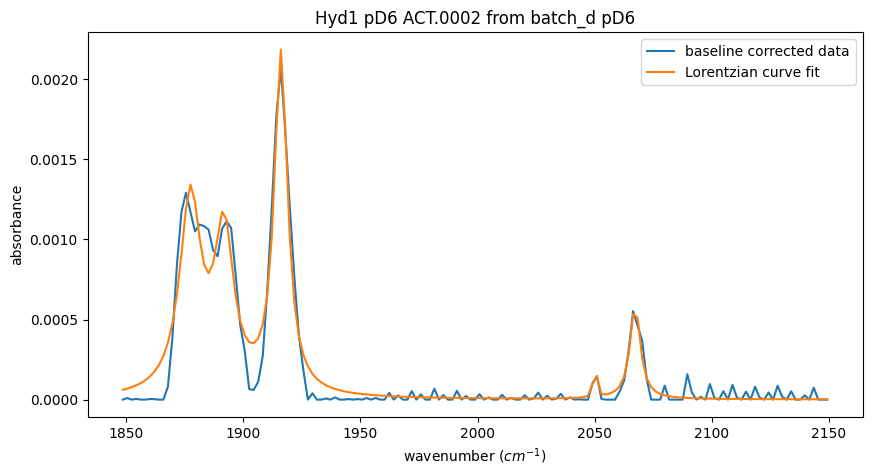

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/lorentzian_fit_plot
Lorentzian fit plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0002/lorentzian_fit_plot
processing plots for Hyd1 pD6 ACT.0003


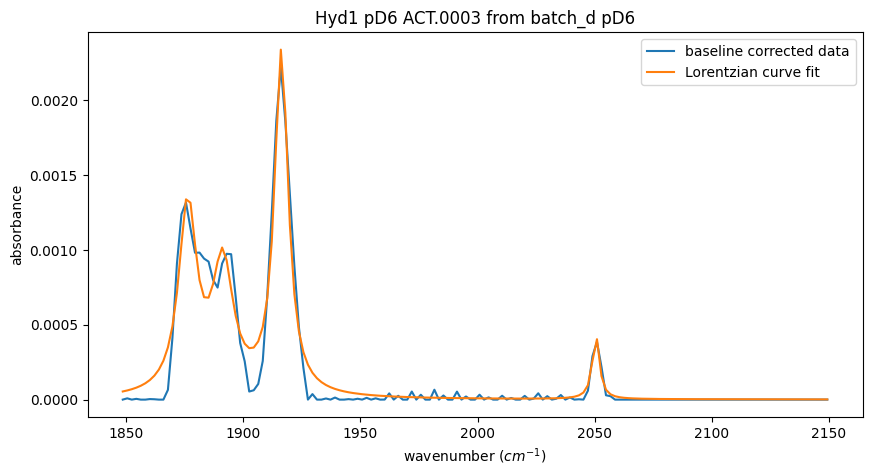

Plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0003/lorentzian_fit_plot
Lorentzian fit plot saved to /Users/anuram/Documents/240808_test3/pD6/Hyd1 pD6 ACT.0003/lorentzian_fit_plot
processing plots for Hyd1 pD6 ACT.0004
processing plots for Hyd1 pD6 ACT.0005
processing plots for Hyd1 pD6 ACT.0006
processing plots for Hyd1 pD6 ACT.0007
processing plots for Hyd1 pD6 ACT.0008
processing plots for Hyd1 pD6 ACT.0009
processing plots for Hyd1 pD6 ACT.0010
processing plots for Hyd1 pD6 ACT.0011
processing plots for Hyd1 pD6 ACT.0012
processing plots for Hyd1 pD6 ACT.0013
processing plots for Hyd1 pD6 ACT.0014
processing plots for Hyd1 pD6 ACT.0015
processing plots for Hyd1 pD6 ACT.0016
processing plots for Hyd1 pD6 ACT.0017
processing plots for Hyd1 pD6 ACT.0018
processing plots for Hyd1 pD6 ACT.0019
processing plots for Hyd1 pD6 ACT.0020
processing plots for Hyd1 pD6 ACT.0021
processing plots for Hyd1 pD6 ACT.0022
processing plots for Hyd1 pD6 ACT.0023
processing plots fo

In [62]:
lorentzian_fit_prospecpy_objects(pD6_raw_data, show_plots = True, save = True, verbose = True)